In [0]:
import numpy as np
_lambda=122
_k=1.5

# define the F(t) function 
def F(t):
  return 1-np.exp(-(t/_lambda)**_k)

# define the R(t) function 
def R(t):
  return 1-F(t)

# define the density function 
def f(t):
  return (_k*t**(_k-1)/_lambda**_k)*np.exp(-(t/_lambda)**_k)


# define the integration function 
# integrate from 0 to tp
# https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html
from scipy import integrate 

def int_tp(tp):
  return integrate.quad(lambda t: t*f(t), 0,tp)[0]


In [0]:
int_tp(10)

0.13875523344758317

In [0]:
#define the gamma function calculation

from math import gamma
def E():
   return _lambda*gamma(1+1/_k)

E(),int_tp(1)


(110.1349257400139, 0.0004450513048994152)

#**A. Replacement at fixed age**



**1.	Minimize the cost of operation**

In [0]:
#Cp_a1=42*2*7+240 #cost of labor/h=42 & for two tech Tp=7h & cost of sparparts=2x120 
#Cf_a1=60*2*7+240 #cost of labor/h=42+18 & for two tech Tp=7h & cost of sparparts=2x120 
Cp_a1=42*4*3+240 #cost of labor/h=42 & for 4 tech Tp=3h & cost of sparparts=2x120 
Cf_a1=60*4*3+240 #cost of labor/h=42+18 & for 4 tech Tp=3h & cost of sparparts=2x120
#Minimizing costs – replacement at a fixed age  𝑡𝑝
def C_fixedage(tp, Cp, Cf):
  return (Cp*R(tp)+Cf*F(tp))/(tp*R(tp)+int_tp(tp))


In [0]:
# define the minimzation function #https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

from scipy.optimize import minimize
minimize(C_fixedage, [10], args=(Cp_a1,Cf_a1), method="SLSQP", bounds=[(1,None)]) # the [10] is the initial guess, can be anything 


     fun: 8.716581924769832
     jac: array([0.])
 message: 'Optimization terminated successfully.'
    nfev: 81
     nit: 27
    njev: 27
  status: 0
 success: True
       x: array([691.65030684])

 **2. Minimizing downtime **


In [0]:
#Cp_a2=42*4*3+240 #cost of labor/h=42 & forfour tech Tp=3h & cost of sparparts=2x120 
#Cf_a2=60*4*3+240 #cost of labor/h=42+18 & for four tech Tp=3h & cost of sparparts=2x120 
#Minimizing downtime – replacement at a fixed age
Tp_a2=3/24  # DT due to preventive replacment for 4 tech in days
Tf_a2=(3+4)/24   # DT due to Failure replacment for 4 tech in days
def DT_fixedage(tp,Tp, Tf):
  #Tp: stop time to make preventive replacment
  return (Tp*R(tp)+Tf*F(tp))/((tp+Tp)*R(tp)+int_tp(tp))

In [0]:
# define the minimzation function downtime
from scipy.optimize import minimize
minimize(DT_fixedage, [10], args=(Tp_a2,Tf_a2), method="SLSQP", bounds=[(1,None)]) # the [10] is the initial guess, can be anything 


     fun: 0.0026288366506535083
     jac: array([-7.31670298e-08])
 message: 'Optimization terminated successfully.'
    nfev: 60
     nit: 20
    njev: 20
  status: 0
 success: True
       x: array([191.8956648])

The optimal tp is 75.566 and the cost of preventive maintenance is $17.418/day  

In [0]:
DT_fixedage(50,Tp_a2,Tf_a2)
R(50)

0.769225852990552



# **B. Replacement at a fixed interval **


**1.	Minimize the cost of operation**

In [0]:
Cp_b1=42*0.7*4*3+240 #cost of labor/h=42*0.7 & forfour tech Tp=3h & cost of sparparts=2x120    & labour cost is 70 %
Cf_b1=60*0.7*4*3+240 #cost of labor/h=(42+18)*0.7 & for four tech Tp=3h & cost of sparparts=2x120 
import numpy as np
#Minimizing costs – replacement at a fixed interval 
def Lamda_b1(t):
  return (t/462)**3.28

def M(t):
  return integrate.quad(lambda t: (t/462)**3.28, 0,t)[0]


def C_fixinterval(tp, Cp_b1, Cf_b1):
  return (Cp_b1+Cf_b1*M(tp))/(tp)


In [0]:
M(10)

8.100849264401412e-06

In [0]:
# define the minimzation function downtime
from scipy.optimize import minimize
minimize(C_fixinterval, [10], args=(Cp_b1,Cf_b1), method="SLSQP", bounds=[(1,None)]) # the [10] is the initial guess, can be anything 


     fun: 6.957708607238829
     jac: array([-3.93390656e-06])
 message: 'Optimization terminated successfully.'
    nfev: 36
     nit: 12
    njev: 12
  status: 0
 success: True
       x: array([111.17408087])

 **2. Minimizing downtime **


In [0]:
Tp_b2=3/24  # DT due to preventive replacment for 4 tech in days
Tf_b2=(3+4)/24   # DT due to Failure replacment for 4 tech in days
def DT_fixinterval(tp,Tp, Tf):
  #Tp: stop time to make preventive replacment
  return (Tf*M(tp)+Tp)/(tp+Tp)

In [0]:
# define the minimzation function downtime
from scipy.optimize import minimize
minimize(DT_fixinterval, [10], args=(Tp_b2,Tf_b2), method="SLSQP", bounds=[(1,None)]) # the [10] is the initial guess, can be anythin

     fun: 0.001693664877736447
     jac: array([-8.11414793e-07])
 message: 'Optimization terminated successfully.'
    nfev: 46
     nit: 15
    njev: 15
  status: 0
 success: True
       x: array([96.08902769])

In [0]:
# import the library required for making plot 
from matplotlib import pyplot as plt

In [0]:
total_cost_fixedge=[]
total_cost_fixinterval=[]
DT_fixedge=[]
DT_fixinterval=[]
for tp in range (1,365):
  total_cost_fixedge.append(C_fixedage(tp,Cp_a1,Cf_a1))
  total_cost_fixinterval.append(C_fixinterval(tp, Cp_b1, Cf_b1))
  DT_fixedge.append(DT_fixedage(tp,Tp_a2, Tf_a2))
  DT_fixinterval.append((Tf_b2*M(tp)+Tp_b2)/(tp+Tp_b2))

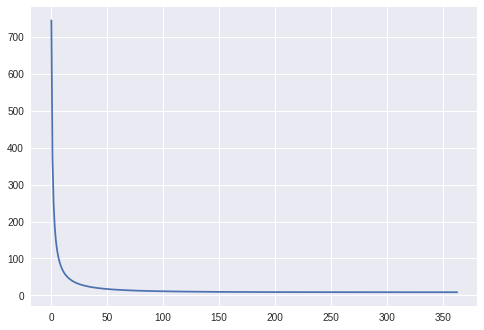

In [0]:
plt.plot(total_cost_fixedge)

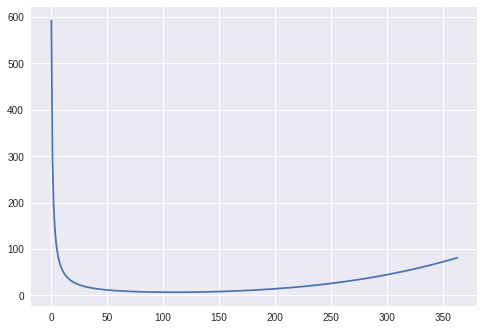

In [0]:
plt.plot(total_cost_fixinterval)


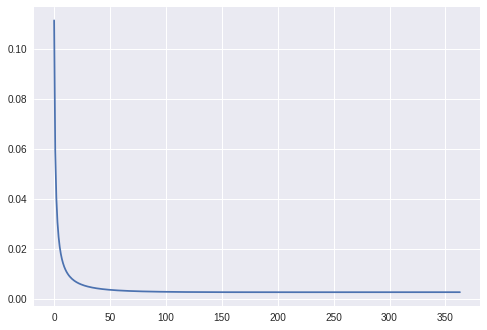

In [0]:
plt.plot(DT_fixedge)


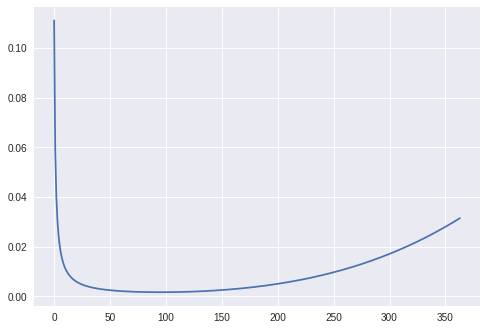

In [0]:
plt.plot(DT_fixinterval)